<a href="https://colab.research.google.com/github/gabbypaola/DATA604/blob/main/G_Martinez_chap15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 15

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [ ]:
# check if the libraries we need are installed

try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

     |████████████████████████████████| 215kB 8.7MB/s 
  Created wheel for modsimpy: filename=modsimpy-1.1.3-cp37-none-any.whl size=20356 sha256=8f4a5a29de6619626b9fdedcf1f3dff38cb49c401d68aaf38338d450e8512797
  Stored in directory: /root/.cache/pip/wheels/59/34/ac/e82f103fbfb5d961b1a4d2b8e89bb6629a4c0b242e5373cbfa
Successfully built modsimpy


### The coffee cooling problem

I'll use a `State` object to store the initial temperature.


In [ ]:
init = State(T=90)

And a `System` object to contain the system parameters.

In [ ]:
coffee = System(init=init,
                volume=300,
                r=0.01,
                T_env=22,
                t_0=0,
                t_end=30,
                dt=1)

The update function implements Newton's law of cooling.

In [ ]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    r, T_env, dt = system.r, system.T_env, system.dt
    
    T = state.T
    T += -r * (T - T_env) * dt
    
    return State(T=T)

Here's how it works.

In [ ]:
update_func(init, 0, coffee)

,values
T,89.32


Here's a version of `run_simulation` that uses `linrange` to make an array of time steps.

In [ ]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

And here's how it works.

In [ ]:
results = run_simulation(coffee, update_func)

Here's what the results look like.

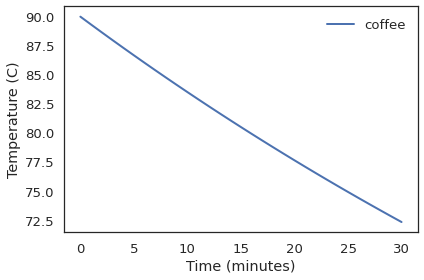

In [ ]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

And here's the final temperature:

In [ ]:
coffee.T_final = get_last_value(results.T)
T_final = get_last_value(results.T)

## Encapsulation

Before we go on, let's define a function to initialize `System` objects with relevant parameters:

In [ ]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
                   
    return System(init=init,
                  r=r, 
                  volume=volume,
                  temp=T_init,
                  t_0=0, 
                  t_end=t_end, 
                  dt=1,
                  T_env=22)

Here's how we use it:

In [ ]:
coffee = make_system(T_init=90, r=0.01, volume=300, t_end=30)
results = run_simulation(coffee, update_func)
T_final = get_last_value(results.T)

In [ ]:
print(T_final)

72.2996253904031


## Exercises

**Exercise:**  Simulate the temperature of 50 mL of milk with a starting temperature of 5 degC, in a vessel with the same insulation, for 15 minutes, and plot the results.

By trial and error, find a value for `r` that makes the final temperature close to 20 C.

In [ ]:
# Solution goes here

milk =  make_system(T_init=5, r= 0.132961, volume=50, t_end=15)
results = run_simulation(milk, update_func)

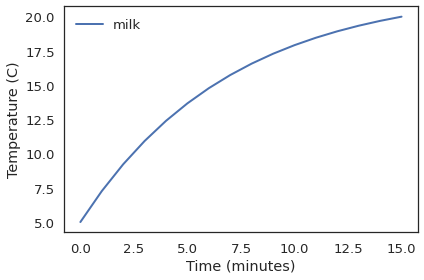

In [ ]:
plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

In [ ]:
milk_final_T = get_last_value(results.T)
print(milk_final_T)

20.00000728842391
